Preparing Dataset

In [27]:
#  https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
import pandas as pd

df = pd.read_csv('./dataset/SMSSpamCollection',
                 sep="\t",
                 header=None,
                 names=['label', 'sms'])

df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Preparing Training & Testing Dataset

In [29]:
from sklearn.preprocessing import LabelBinarizer

x = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['ham', 'spam'], dtype='<U4')

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train,'\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


Feature Extraction dengan TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print(x_train_tfidf)

  (0, 6903)	0.3591386422223876
  (0, 2006)	0.2898082580285881
  (0, 900)	0.4114867709157148
  (0, 6739)	0.3546359942830148
  (0, 2554)	0.3825278811525034
  (0, 3926)	0.3126721340000456
  (0, 4453)	0.2297719954323795
  (0, 5123)	0.308974289326673
  (0, 3007)	0.21421364306658514
  (0, 2997)	0.23173982975834367
  (1, 36)	0.28902673040368515
  (1, 1548)	0.18167737976542422
  (1, 2003)	0.2711077935907125
  (1, 5301)	0.2711077935907125
  (1, 4358)	0.17341410292348694
  (1, 532)	0.20186022353306565
  (1, 6131)	0.16142609035094446
  (1, 5394)	0.16464655071448758
  (1, 4677)	0.24039776602646504
  (1, 216)	0.28902673040368515
  (1, 6013)	0.20089911182610476
  (1, 6472)	0.24039776602646504
  (1, 5441)	0.5009783758205715
  (1, 799)	0.25048918791028574
  (1, 5642)	0.24344998442301355
  :	:
  (4176, 343)	0.2811068572055718
  (4176, 107)	0.29968668460649284
  (4176, 2004)	0.25589560236817055
  (4176, 4350)	0.29968668460649284
  (4176, 637)	0.29968668460649284
  (4176, 7114)	0.4512018097459442
  (4176

Binary Classification dengan Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_tfidf,y_train)
y_pred = model.predict(x_test_tfidf)

for pred, sms in zip(y_pred[5:], x_test[5:]):
  print("Pred:", pred,"- SMS:",sms)

Evaluation Metrics pada Binary Classification

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_pred)
matrix

In [38]:
true_negative, true_positive, false_negative, false_positive = matrix.ravel()

print("TN:",true_negative)
print("TP:",true_positive)
print("FP:",false_positive)
print("FN:",false_negative)

TN: 1207
TP: 1
FP: 137
FN: 48


In [ ]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

Precision & Recall

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test,y_pred)

F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

Receiver Operating Characteristic

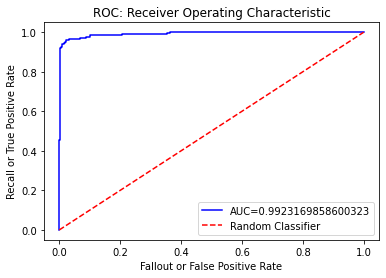

In [45]:
from sklearn.metrics._plot.roc_curve import auc
from sklearn.metrics import roc_curve,accuracy_score

prob_estimates = model.predict_proba(x_test_tfidf)

false_positive_range, true_positive_range, treshold = roc_curve(y_test, prob_estimates[:,1])
nilai_auc = auc(false_positive_range, true_positive_range)

# Plotting to Graph
plt.plot(false_positive_range, true_positive_range,'b', label=f"AUC={nilai_auc}")
plt.plot([0,1],[0,1],'r--',label="Random Classifier")

plt.title("ROC: Receiver Operating Characteristic")
plt.xlabel("Fallout or False Positive Rate")
plt.ylabel("Recall or True Positive Rate")
plt.legend()
plt.show()